In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import matplotlib.colors as mcolors
import seaborn as sns

In [101]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 16) 
mpl.rc('ytick', labelsize = 16)

In [121]:
colors = ['gray', '#2f4f4f', '#e76f51', '#eba75f', '#2a9d8f', '#f5d23f']

In [103]:
PATH_TO_DATA = '/Users/ulyanadupletsa/Documents/CoBA/Results/'

In [104]:
file_names = ['Errors_ET_cryo_10_BNS_SNR8.0', 
              'Errors_ET_HF_10_BNS_SNR8.0', 
              'Errors_ET_cryo_15_BNS_SNR8.0',
              'Errors_ET_HF_15_BNS_SNR8.0', 
              'Errors_L_Sar15_ET_cryo_L_Neth15_ET_cryo_BNS_SNR8.0',
              'Errors_L_Sar15_ET_HF_L_Neth15_ET_HF_BNS_SNR8.0',
              'Errors_L_Sar20_ET_cryo_L_Neth20_ET_cryo_BNS_SNR8.0', 
              'Errors_L_Sar20_ET_HF_L_Neth20_ET_HF_BNS_SNR8.0']
titles = ['$\Delta$ 10km HFLF cryo',
          '$\Delta$ 10km HF', 
          '$\Delta$ 15km HFLF cryo',
          '$\Delta$ 15km HF',     
          '2L 15km HFLF cryo', 
          '2L 15km HF', 
          '2L 20km HFLF cryo',
          '2L 20km HF']

In [105]:
lbs_errs = ['snr', 'mass_1', 'mass_2', 'luminosity_distance', 
            'dec', 'ra', 'theta_jn', 'psi', 'geocent_time', 'phase', 
            'redshift', 'a_1', 'a_2', 'lambda_1', 'lambda_2', 
            'err_mass_1', 'err_mass_2', 'err_luminosity_distance', 
            'err_dec', 'err_ra', 'err_theta_jn', 'err_psi', 'err_geocent_time', 
            'err_phase', 'err_a_1', 'err_a_2', 'err_lambda_1', 'err_lambda_2', 
            'sky_loc']
lbs_signals = ['mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'geocent_time', 'phase', 
               'redshift', 'a_1', 'a_2', 'lambda_1', 'lambda_2', 'ET_cryo_10', 'ET_cryo_15', 'ET_HF_10', 'ET_HF_15', 
               'ET_2L_cryo_15', 'ET_2L_cryo_20', 'ET_2L_HF_15', 'ET_2L_HF_20']

In [106]:
injections = pd.read_csv(PATH_TO_DATA + 'Signals.txt', names = lbs_signals, skiprows = 1, delimiter = ' ')

In [107]:
my_alpha = 0.1
my_linewidth = 1.5

In [108]:
def apply_alpha(hex_color, alpha=0.1, bg_color=(1, 1, 1)):
    rgb = mcolors.hex2color(hex_color)  # Convert hex to RGB
    blended_rgb = [(1 - alpha) * bg + alpha * fg for bg, fg in zip(bg_color, rgb)]
    return mcolors.to_hex(blended_rgb)

In [120]:
colors_with_alpha = ['#f2f2f2', '#eaeded', '#fdf1ee', '#fdf6ef', '#eaf5f4', '#fefbec']

In [122]:
sky_loc_area = [1000, 100, 10, 1]

inj = mpatches.Patch(facecolor=colors_with_alpha[0], edgecolor=colors[0], linewidth=my_linewidth, label='injected')
det = mpatches.Patch(facecolor=colors_with_alpha[1], edgecolor=colors[1], linewidth=my_linewidth, label='detected')  
sky_loc0 = mpatches.Patch(facecolor=colors_with_alpha[2], edgecolor=colors[2], linewidth=my_linewidth, label='$\Delta \Omega < %s$ deg$^2$' %str(sky_loc_area[0]))
sky_loc1 = mpatches.Patch(facecolor=colors_with_alpha[3], edgecolor=colors[3], linewidth=my_linewidth, label='$\Delta \Omega < %s$ deg$^2$' %str(sky_loc_area[1]))
sky_loc2 = mpatches.Patch(facecolor=colors_with_alpha[4], edgecolor=colors[4], linewidth=my_linewidth, label='$\Delta \Omega < %s$ deg$^2$' %str(sky_loc_area[2]))
sky_loc3 = mpatches.Patch(facecolor=colors_with_alpha[5], edgecolor=colors[5], linewidth=my_linewidth, label='$\Delta \Omega < %s$ deg$^2$' %str(sky_loc_area[3]))

/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_29513/1600691196.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=titles[i], title_fontsize=16, frameon=False, loc='upper center')
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_29513/1600691196.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=titles[i], title_fontsize=16, frameon=False, loc='upper center')
/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_29513/1600691196.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=titles[i], title_fontsize=16, frameon=False, loc='upper c

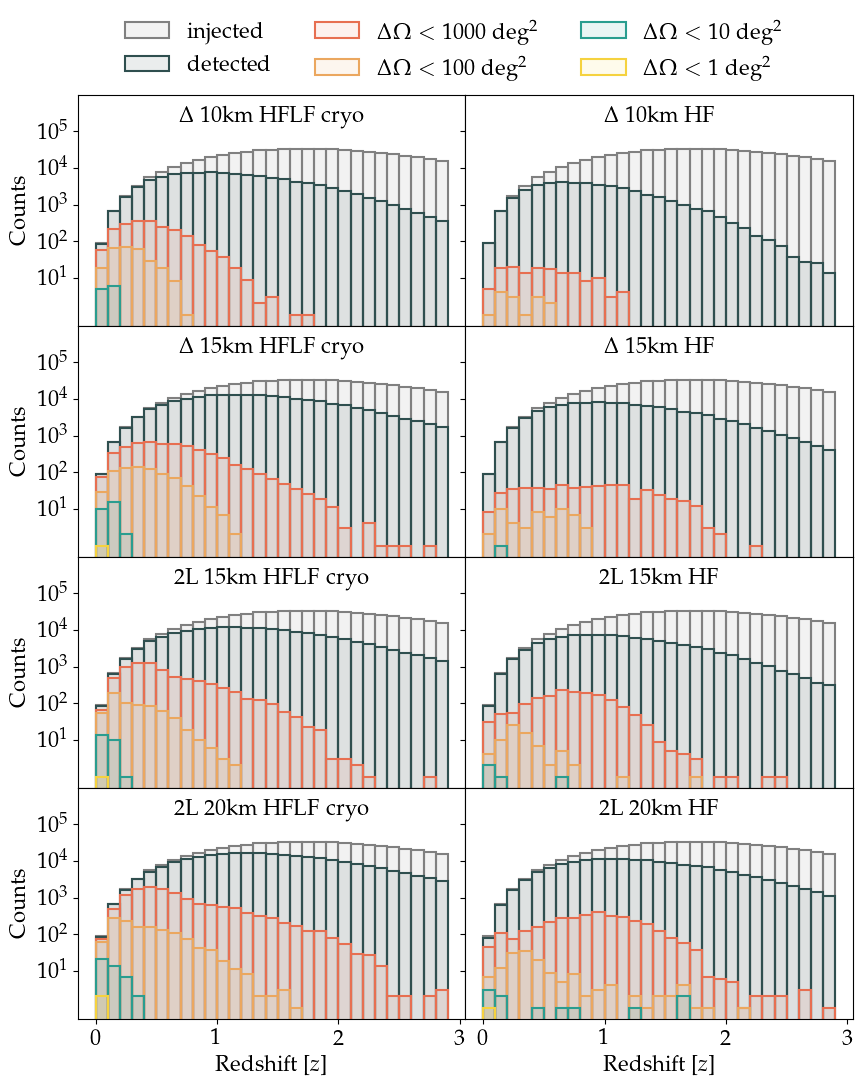

In [123]:
# Plot histograms of sky-localization for each data set in sub_files list
# compare column-wise, HFLF cryo vs HF
# make one figure with 2 columns


fig, axs = plt.subplots(4, 2, figsize=(10, 12), sharex=True, sharey=True)


for i, ax in enumerate(axs.flat):
    data = pd.read_csv(PATH_TO_DATA + file_names[i] + '.txt', names = lbs_errs, skiprows = 1, delimiter = ' ')
    data = data.loc[data['redshift'] <= 3.]
    sns.histplot(x = injections['redshift'], bins = np.arange(0, 3, 0.1), ax=ax, color = colors[0], alpha=my_alpha, edgecolor=colors[0], linewidth=my_linewidth)
    sns.histplot(x = data['redshift'], bins = np.arange(0, 3, 0.1), ax=ax, color = colors[1], alpha=my_alpha, edgecolor=colors[1], linewidth=my_linewidth)
    for j, value_area in enumerate(sky_loc_area):
        sky_loc_filtered = data.loc[4.6 * (180./np.pi)**2 * data['sky_loc'] < value_area]
        sns.histplot(x = sky_loc_filtered['redshift'], bins = np.arange(0, 3, 0.1),
                     ax=ax, color=colors[j+2], alpha=my_alpha, edgecolor=colors[j+2], linewidth=my_linewidth)
        
    ax.set_xlabel('Redshift [$z$]', fontsize=16)
    ax.set_ylabel('Counts', fontsize=16)
    ax.set_yscale('log')
    ax.set_ylim(0.5, 1e6)
    ax.set_yticks([1e1, 1e2, 1e3, 1e4, 1e5])
    ax.legend(title=titles[i], title_fontsize=16, frameon=False, loc='upper center')

fig.subplots_adjust(hspace=0, wspace=0)
fig.legend(handles=[inj, det, sky_loc0, sky_loc1, sky_loc2, sky_loc3], fontsize=16, loc='upper center', bbox_to_anchor=(0.5,0.96), ncol = 3, frameon=False)
plt.savefig('plots/coba_hist_detection_sky_loc.pdf', bbox_inches='tight')
plt.show()

